**YAP 470**

*License Plate Recognition System Project*

*Utku Murat Atasoy / 211401019 / u.atasoy@etu.edu.tr*

**Check for CUDA**

In [1]:
!nvidia-smi

Sat Dec 14 11:29:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|


|   0  NVIDIA GeForce RTX 3060 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P3              17W /  40W |      7MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
                                                                                         
+---------------------------------------------------------------------------------------+
| Processes:                                                                            |
|  GPU   GI   CI        PID   Type   Process name                            GPU Memory |
|        ID   ID                                                             Usage      |
|=======================================================================================|
|    0   N/A  N/A      2453      G   /usr/lib/xorg/Xorg                            4MiB |
+---------

**Import YOLO**

In [ ]:
!pip install ultralytics
!pip install roboflow

In [8]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Setup complete ✅ (12 CPUs, 13.5 GB RAM, 71.7/195.8 GB disk)


In [9]:
from ultralytics import YOLO

**Import Datasets from Roboflow**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Bo5Jwg18glfHJRbsljem")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:06<00:00, 7578.75it/s]


In [ ]:
rf = Roboflow(api_key="Bo5Jwg18glfHJRbsljem")
project = rf.workspace("augmented-startups").project("vehicle-registration-plates-trudk")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-Registration-Plates-2 in yolov11:: 100%|██████████| 42362/42362 [00:05<00:00, 7621.58it/s]


In [ ]:
rf = Roboflow(api_key="Bo5Jwg18glfHJRbsljem")
project = rf.workspace("kemalkilicaslan-gzpvq").project("license-plates-of-vehicles-in-turkey")
version = project.version(44)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-plates-of-vehicles-in-Turkey-44 in yolov11:: 100%|██████████| 13172/13172 [00:01<00:00, 6796.00it/s]


**Combine all datasets to achieve challenging variations**

In [ ]:
import os
import shutil

source_dirs = [
    "/content/License-plates-of-vehicles-in-Turkey-44/test/images",
    "/content/License-plates-of-vehicles-in-Turkey-44/test/labels",
    "/content/License-plates-of-vehicles-in-Turkey-44/train/images",
    "/content/License-plates-of-vehicles-in-Turkey-44/train/labels",
    "/content/License-plates-of-vehicles-in-Turkey-44/valid/images",
    "/content/License-plates-of-vehicles-in-Turkey-44/valid/labels"
]

target_dirs = [
    "/content/License-Plate-Recognition-4/test/images",
    "/content/License-Plate-Recognition-4/test/labels",
    "/content/License-Plate-Recognition-4/train/images",
    "/content/License-Plate-Recognition-4/train/labels",
    "/content/License-Plate-Recognition-4/valid/images",
    "/content/License-Plate-Recognition-4/valid/labels"
]

for source_dir, target_dir in zip(source_dirs, target_dirs):
    if os.path.exists(source_dir):
        if not os.path.exists(target_dir):
            os.makedirs(target_dir)

        for file_name in os.listdir(source_dir):
            source_file = os.path.join(source_dir, file_name)
            target_file = os.path.join(target_dir, file_name)

            if os.path.isfile(source_file):
                shutil.move(source_file, target_file)
                print(f"'{source_file}' -> '{target_file}' taşındı.")
    else:
        print(f"'{source_dir}' not found.")


In [ ]:
source_paths = [
    "/content/Vehicle-Registration-Plates-2/test/images",
    "/content/Vehicle-Registration-Plates-2/test/labels",
    "/content/Vehicle-Registration-Plates-2/train/images",
    "/content/Vehicle-Registration-Plates-2/train/labels",
    "/content/Vehicle-Registration-Plates-2/valid/images",
    "/content/Vehicle-Registration-Plates-2/valid/labels"
]

destination_paths = [
    "/content/License-Plate-Recognition-4/test/images",
    "/content/License-Plate-Recognition-4/test/labels",
    "/content/License-Plate-Recognition-4/train/images",
    "/content/License-Plate-Recognition-4/train/labels",
    "/content/License-Plate-Recognition-4/valid/images",
    "/content/License-Plate-Recognition-4/valid/labels"
]

for source, destination in zip(source_paths, destination_paths):
    if not os.path.exists(destination):
        os.makedirs(destination)

    if os.path.exists(source):
        for file_name in os.listdir(source):
            source_file = os.path.join(source, file_name)
            destination_file = os.path.join(destination, file_name)

            if os.path.isfile(source_file):
                shutil.move(source_file, destination_file)
                print(f"{source_file} -> {destination_file} taşındı.")
    else:
        print(f"{source} not found.")


**YOLOv8 - EPOCHS: 10**

**Training**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data="/home/utku/licensePlateDataset/data.yaml" device='cuda:0' save=True epochs=10 val=True plots=True imgsz=640

New https://pypi.org/project/ultralytics/8.3.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.70 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/utku/licensePlateDataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

**Validation**

In [ ]:
!yolo task=detect mode=val model="/home/utku/runs/detect/train/weights/best.pt" data="/home/utku/licensePlateDataset/data.yaml" save_json=True plots=True

Ultralytics YOLOv8.2.70 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/utku/licensePlateDataset/valid/labels.cache... 2048 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2048       2134      0.973      0.953      0.978      0.681
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Test**

In [ ]:
!yolo task=detect mode=predict model="/home/utku/runs/detect/train/weights/best.pt" conf=0.65 source="/home/utku/licensePlateDataset/test/images/" save=True

Ultralytics YOLOv8.2.70 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1020 /home/utku/licensePlateDataset/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 1 License_Plate, 4.6ms
image 2/1020 /home/utku/licensePlateDataset/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 4.3ms
image 3/1020 /home/utku/licensePlateDataset/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 (no detections), 3.9ms
image 4/1020 /home/utku/licensePlateDataset/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 (no detections), 4.0ms
image 5/1020 /home/utku/licensePlateDataset/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 (no detections), 4.8ms
image 6/1020 /home/utku/licensePlateDataset/test/images/0026c2

**YOLOv8 - EPOCHS: 100**

**Training**

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data="/home/utku/licensePlateDataset/data.yaml" device='cuda:0' save=True epochs=100 val=True plots=True imgsz=640

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/utku/licensePlateDataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

**Validation**

In [ ]:
!yolo task=detect mode=val model="/home/utku/runs/detect/train3/weights/best.pt" data="/home/utku/licensePlateDataset/data.yaml" save_json=True plots=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/utku/licensePlateDataset/valid/labels.cache... 2048 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2048       2134      0.978      0.968      0.988       0.71
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val3/predictions.json...
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


**Test**

In [ ]:
!yolo task=detect mode=predict model="/home/utku/runs/detect/train3/weights/best.pt" conf=0.65 source="/home/utku/licensePlateDataset/test/images/" save=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1020 /home/utku/licensePlateDataset/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 2 License_Plates, 4.3ms
image 2/1020 /home/utku/licensePlateDataset/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 4.4ms
image 3/1020 /home/utku/licensePlateDataset/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 (no detections), 4.0ms
image 4/1020 /home/utku/licensePlateDataset/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 1 License_Plate, 4.7ms
image 5/1020 /home/utku/licensePlateDataset/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 1 License_Plate, 4.3ms
image 6/1020 /home/utku/licensePlateDataset/test/images/0026c246d5

**YOLOv11 - EPOCHS: 10**

**Training**

In [ ]:
!yolo detect train data="/home/utku/licensePlateDataset/data.yaml" device='cuda:0' save=True epochs=10 val=True plots=True imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:03<00:00, 1.41MB/s]
Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/utku/licensePlateDataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

**Validation**

In [ ]:
!yolo task=detect mode=val model="/home/utku/runs/detect/train2/weights/best.pt" data="/home/utku/licensePlateDataset/data.yaml" save_json=True plots=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /home/utku/licensePlateDataset/valid/labels.cache... 2048 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2048       2134      0.982      0.951      0.981      0.683
Speed: 0.4ms preprocess, 3.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val2/predictions.json...
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


**Test**

In [ ]:
!yolo task=detect mode=predict model="/home/utku/runs/detect/train2/weights/best.pt" conf=0.65 source="/home/utku/licensePlateDataset/test/images/" save=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1020 /home/utku/licensePlateDataset/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 1 License_Plate, 5.7ms
image 2/1020 /home/utku/licensePlateDataset/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 5.7ms
image 3/1020 /home/utku/licensePlateDataset/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 1 License_Plate, 5.2ms
image 4/1020 /home/utku/licensePlateDataset/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 (no detections), 6.0ms
image 5/1020 /home/utku/licensePlateDataset/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 (no detections), 6.1ms
image 6/1020 /home/utku/licensePlateDataset/test/images/0026c246d

**YOLOv11 - EPOCHS: 100**

**Training**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data="/home/utku/licensePlateDataset/data.yaml" device='cuda:0' save=True epochs=100 val=True plots=True imgsz=640

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/utku/licensePlateDataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

**Validation**

In [ ]:
!yolo task=detect mode=val model="/home/utku/runs/detect/train4/weights/best.pt" data="/home/utku/licensePlateDataset/data.yaml" save_json=True plots=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /home/utku/licensePlateDataset/valid/labels.cache... 2048 images, 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2048       2134      0.977      0.971      0.985      0.711
Speed: 0.4ms preprocess, 3.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val4/predictions.json...
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


**Test**

In [ ]:
!yolo task=detect mode=predict model="/home/utku/runs/detect/train4/weights/best.pt" conf=0.65 source="/home/utku/licensePlateDataset/test/images/" save=True

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1020 /home/utku/licensePlateDataset/test/images/0002a5b67e5f0909_jpg.rf.07ca41e79eb878b14032f650f34d0967.jpg: 640x640 1 License_Plate, 6.0ms
image 2/1020 /home/utku/licensePlateDataset/test/images/000812dcf304a8e7_jpg.rf.559f904bc045f68ee947796a1b561d8f.jpg: 640x640 1 License_Plate, 6.1ms
image 3/1020 /home/utku/licensePlateDataset/test/images/0010f4c10f7ab07e_jpg.rf.92344aa620e23aacc490273e32343595.jpg: 640x640 (no detections), 6.5ms
image 4/1020 /home/utku/licensePlateDataset/test/images/001cdd25e148cd36_jpg.rf.eca53e55e3cf5986bcfd95bc277b6438.jpg: 640x640 (no detections), 6.0ms
image 5/1020 /home/utku/licensePlateDataset/test/images/002519f868563098_jpg.rf.b9450b9265c92d8d3bd96bdfeff635e5.jpg: 640x640 1 License_Plate, 6.0ms
image 6/1020 /home/utku/licensePlateDataset/test/images/0026c246d

**Ablation Study for all YOLOV11 alternatives (n,s,m,l,x)**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11s.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11)m.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11l.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11x.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=20, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' batch=64 save=True epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11x.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' batch=64 save=True epochs=20 val=True plots=True imgsz=640

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

**Ablation Study for all YOLOv11 variants**

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11s.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11m.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11l.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11x.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=20, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640
!yolo task=detect mode=train model=yolo11x.pt data="/content/License-Plate-Recognition-4/data.yaml" device='cuda:0' save=True batch=64 epochs=20 val=True plots=True imgsz=640

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/License-Plate-Recognition-4/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

**Feature Extraction and Sample Outputs of Layers of Trained YOLO model**

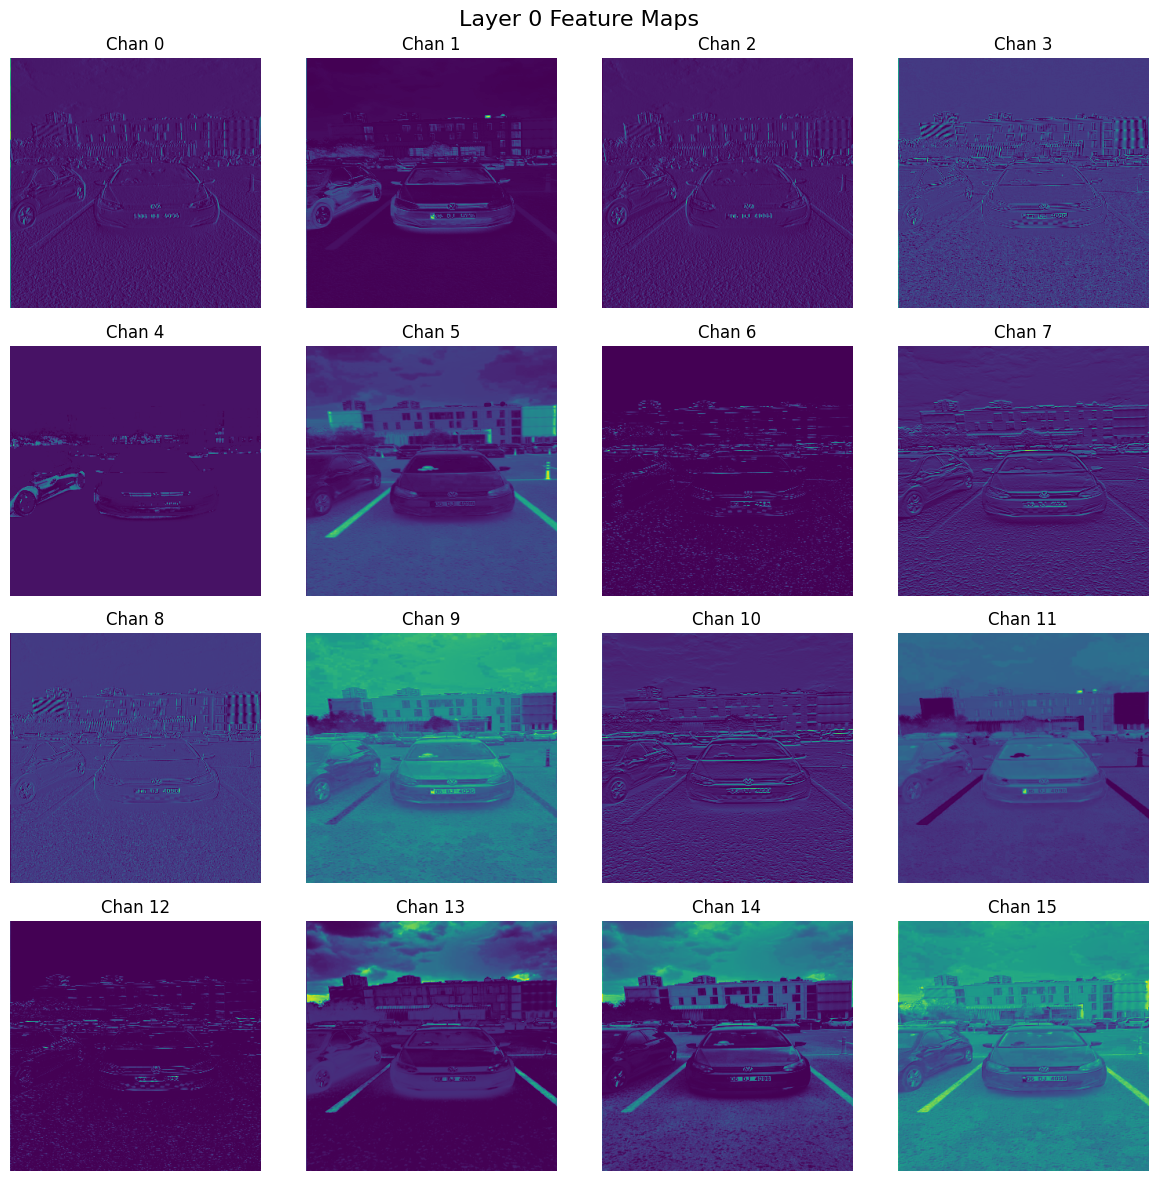

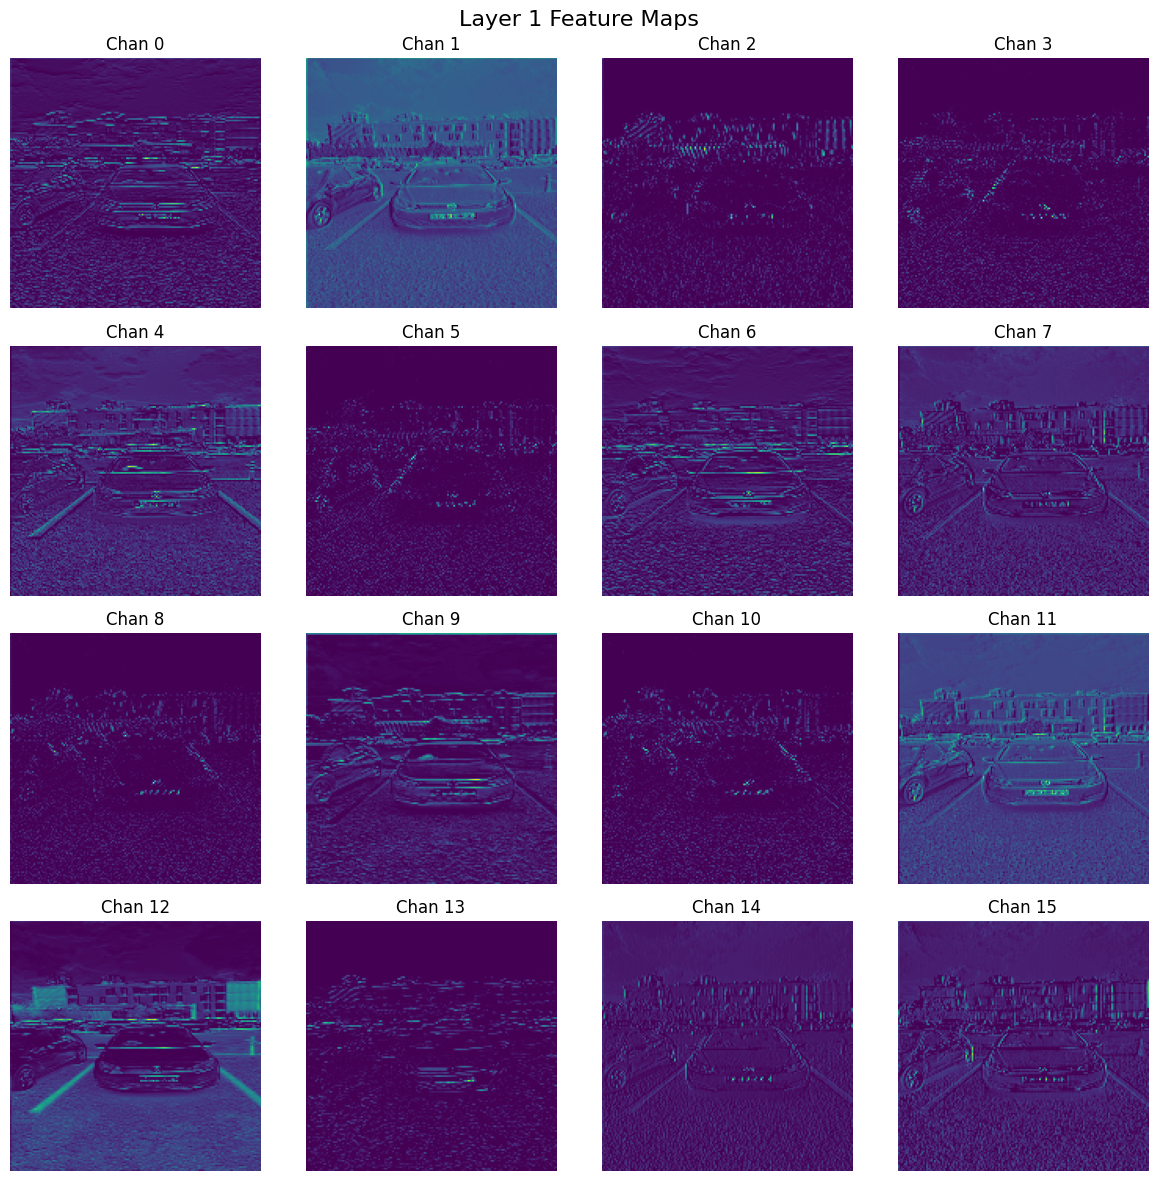

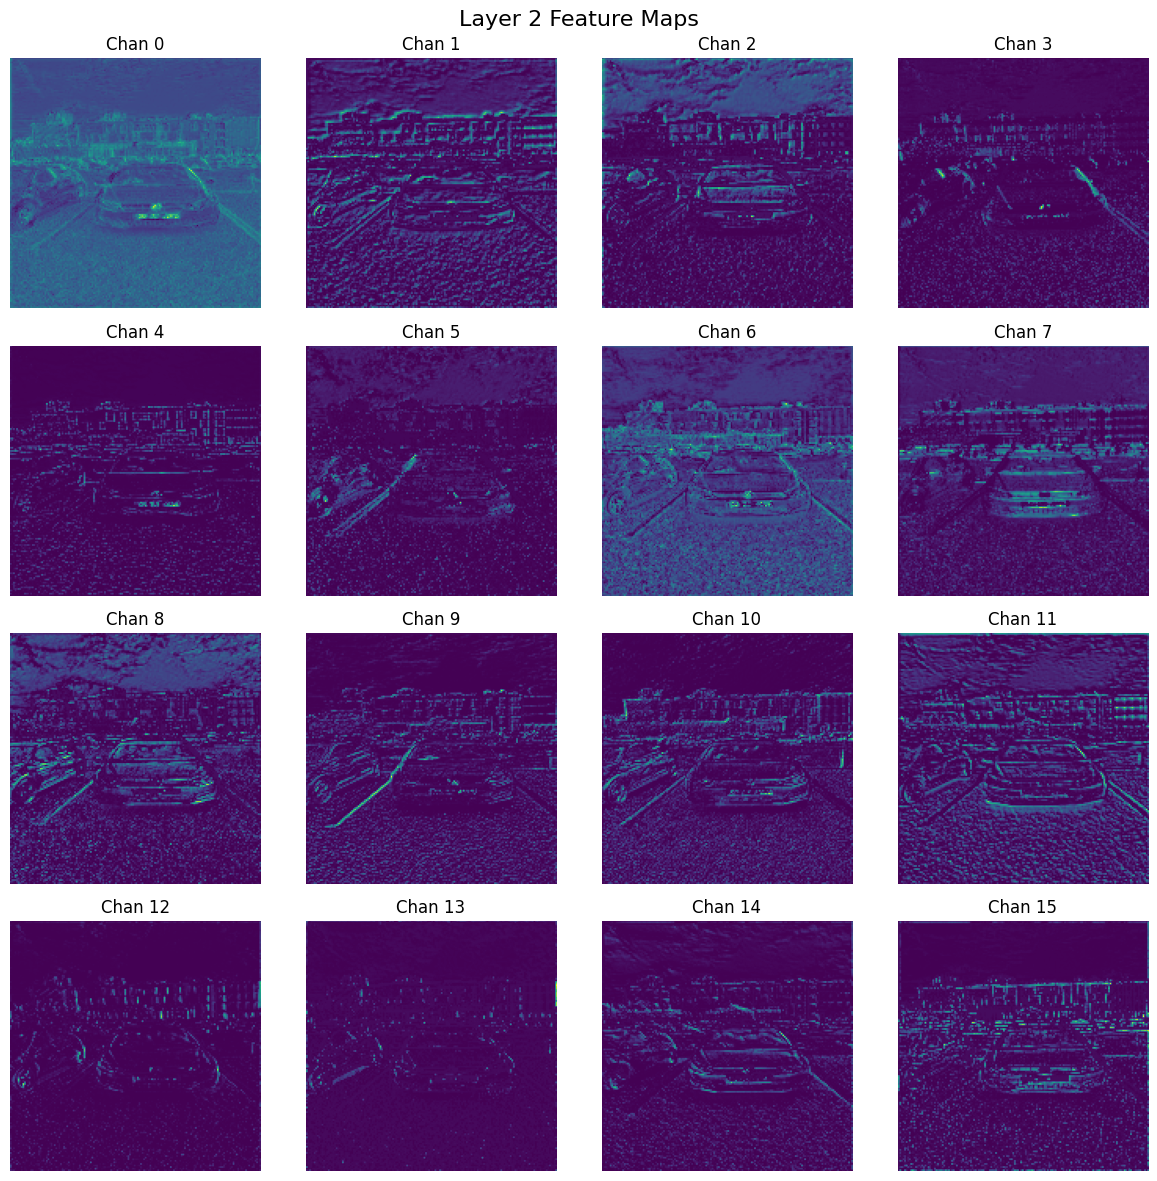

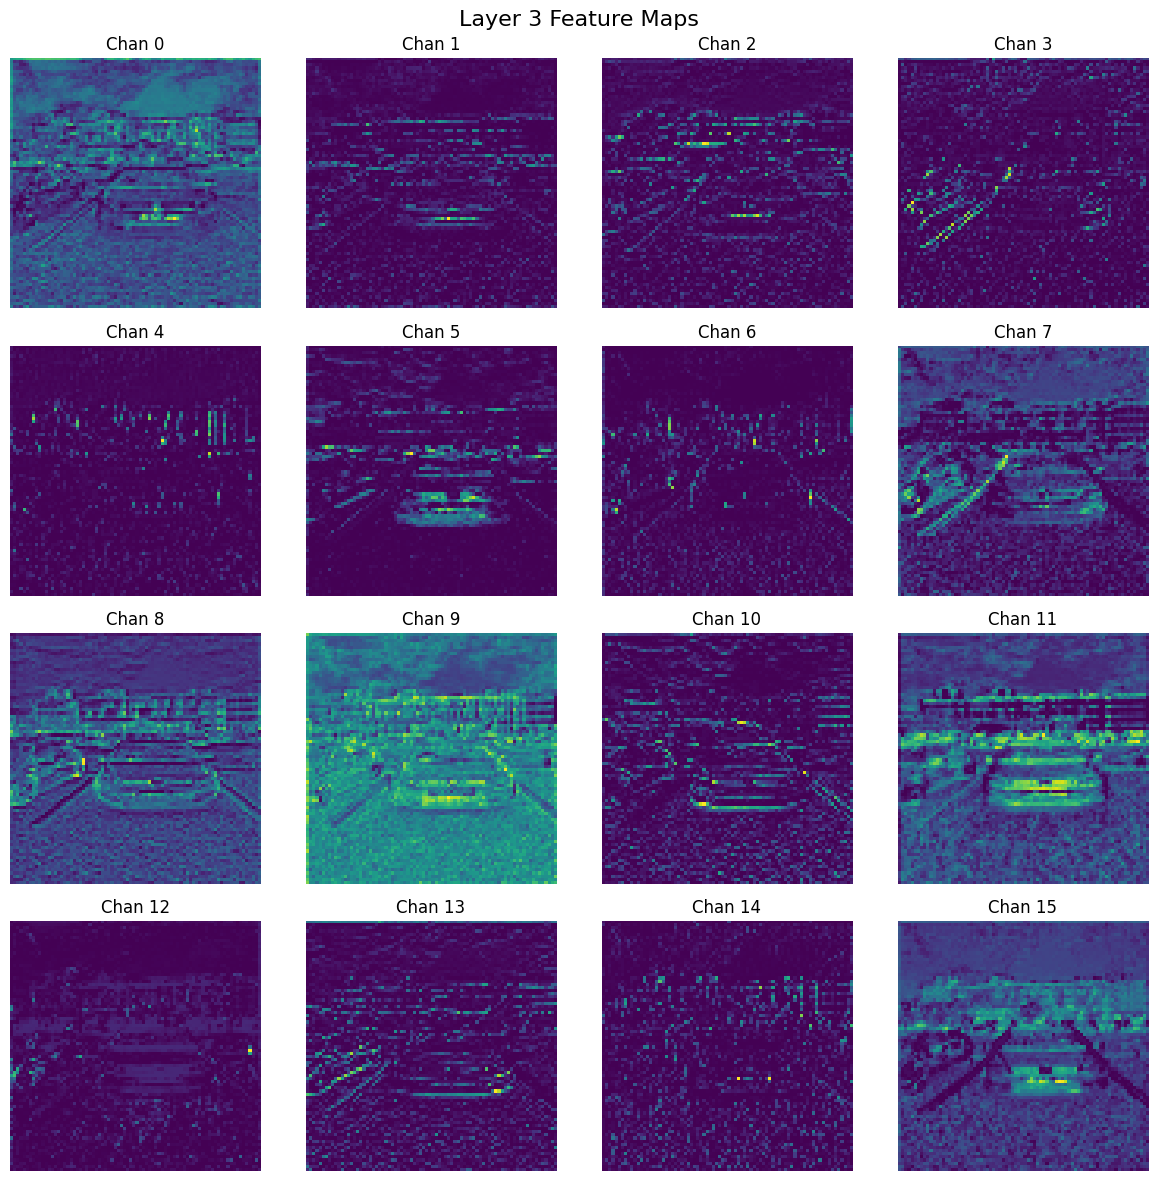

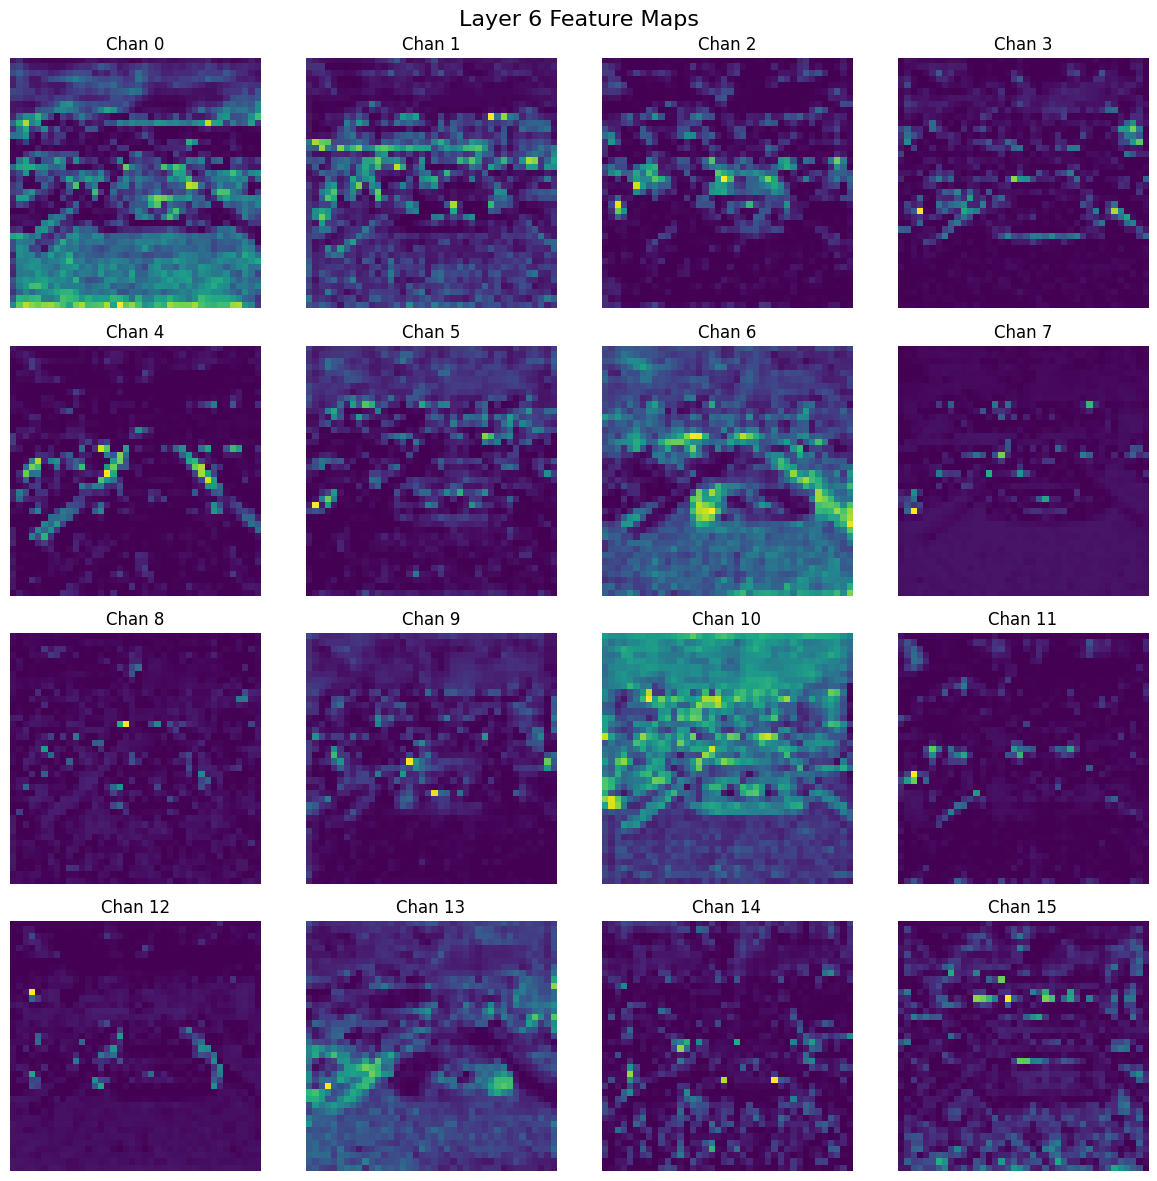

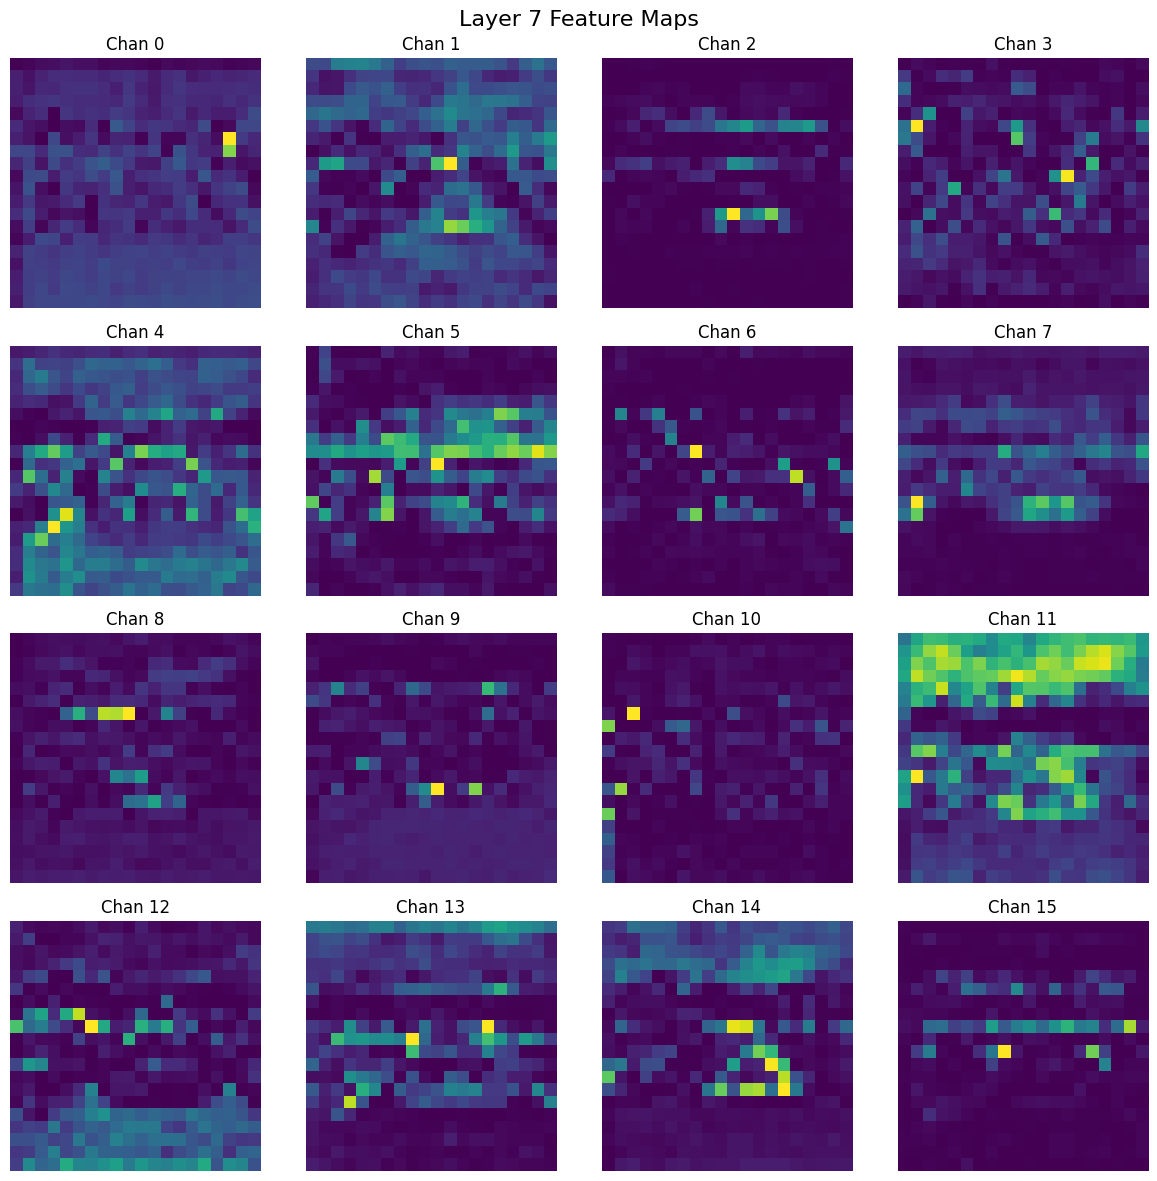

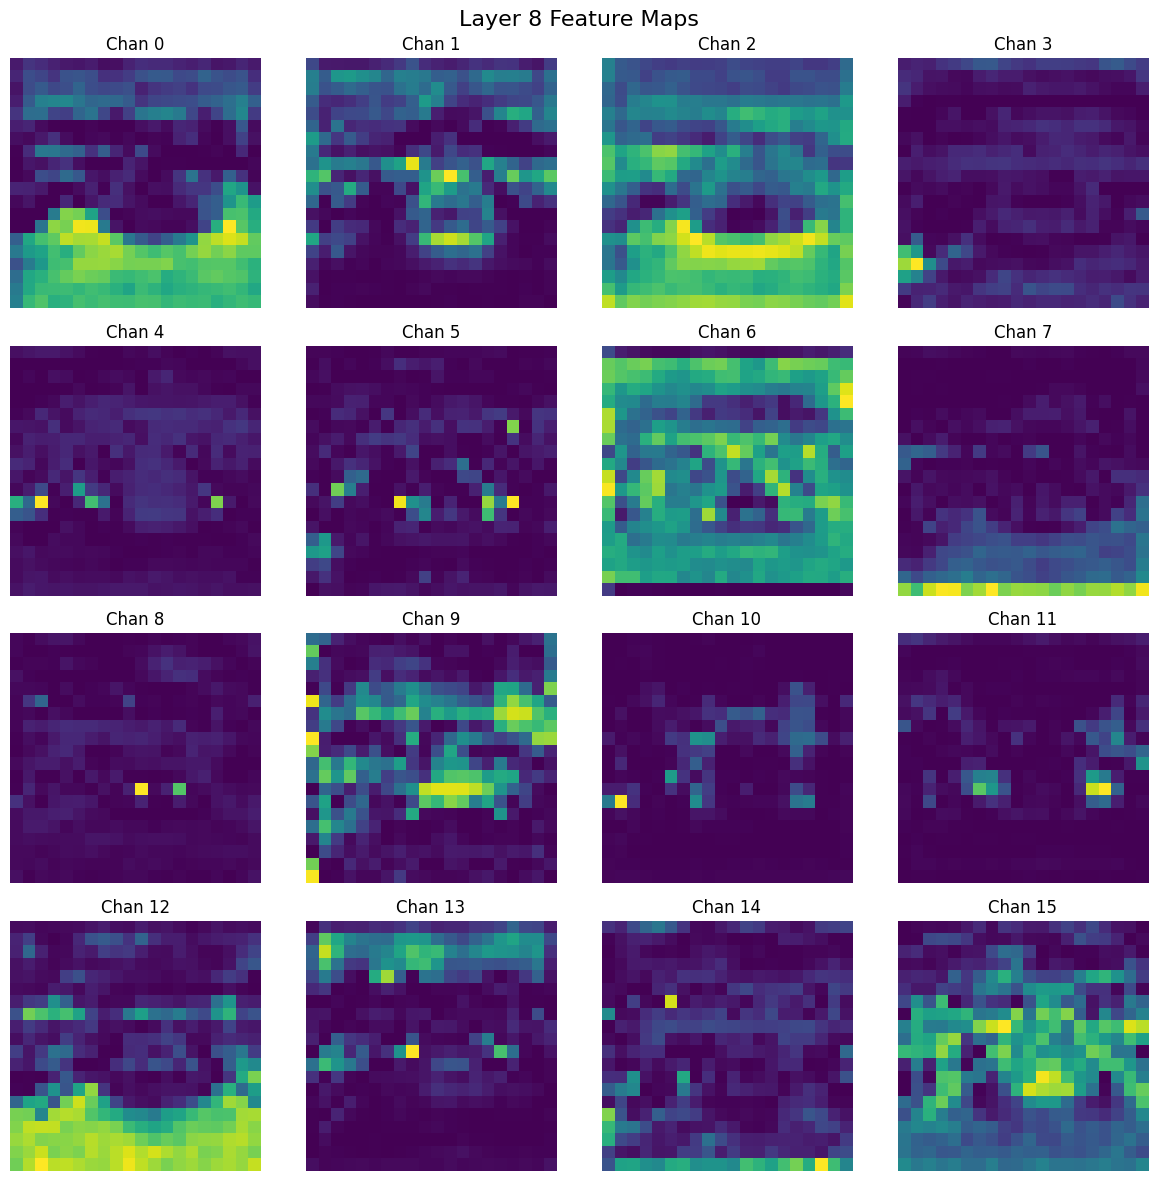

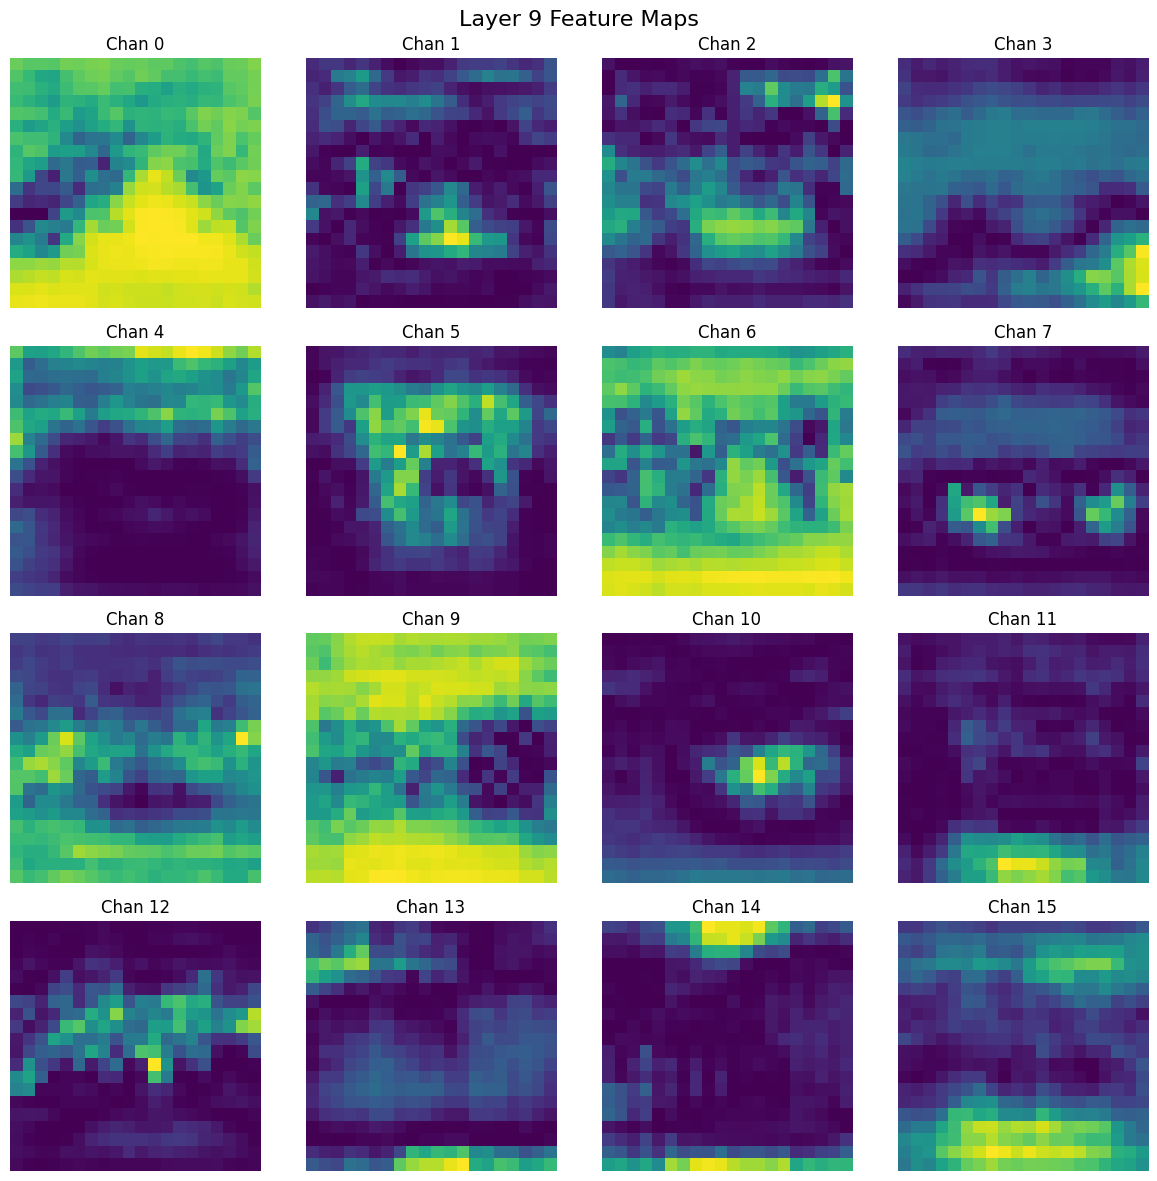

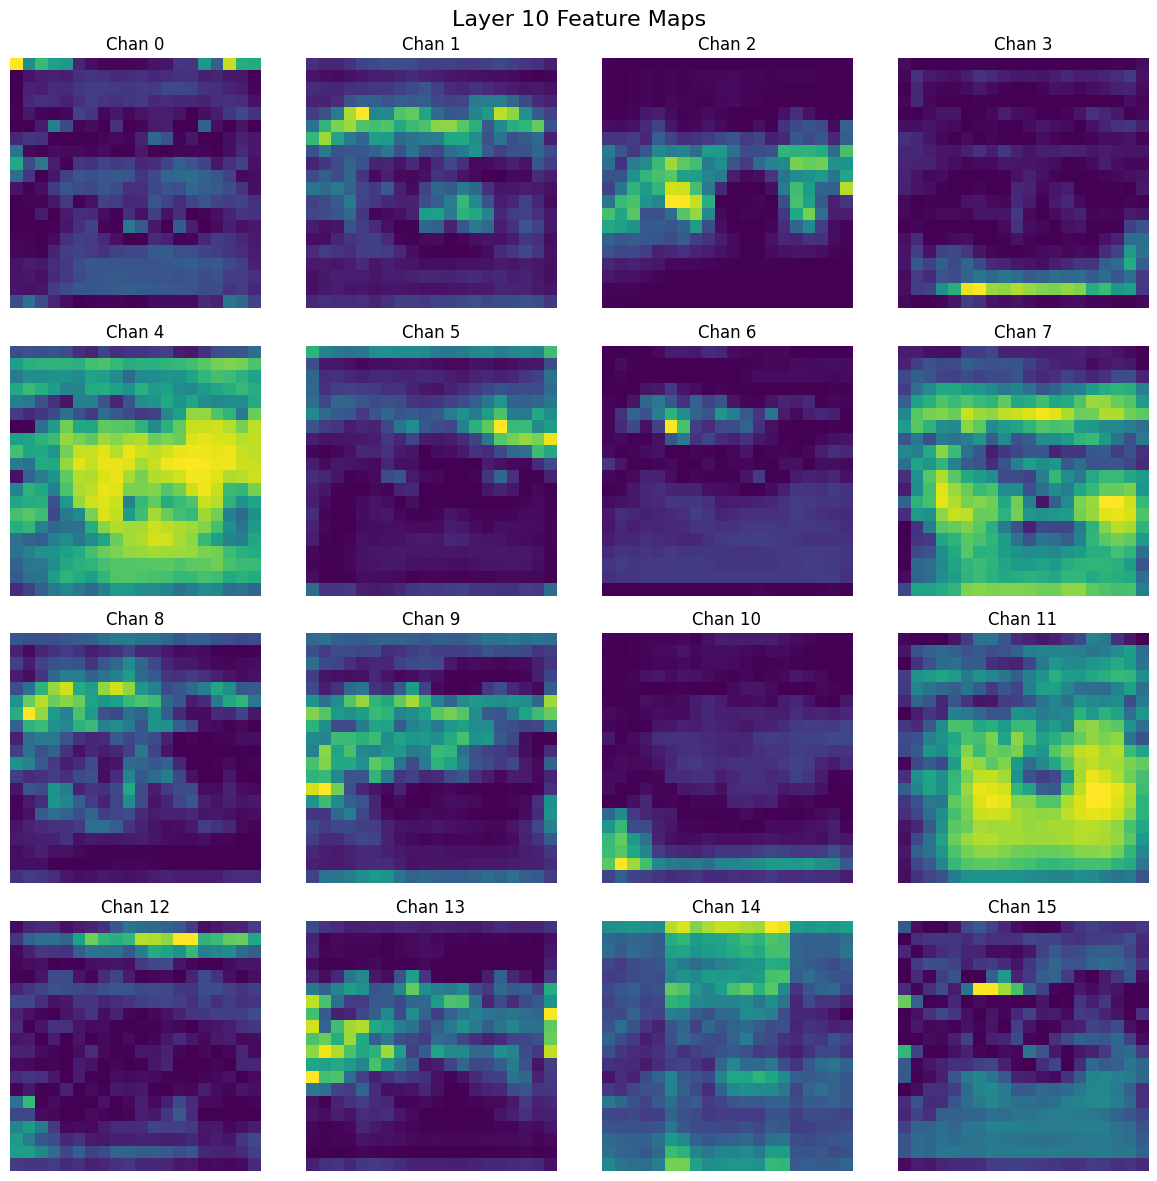

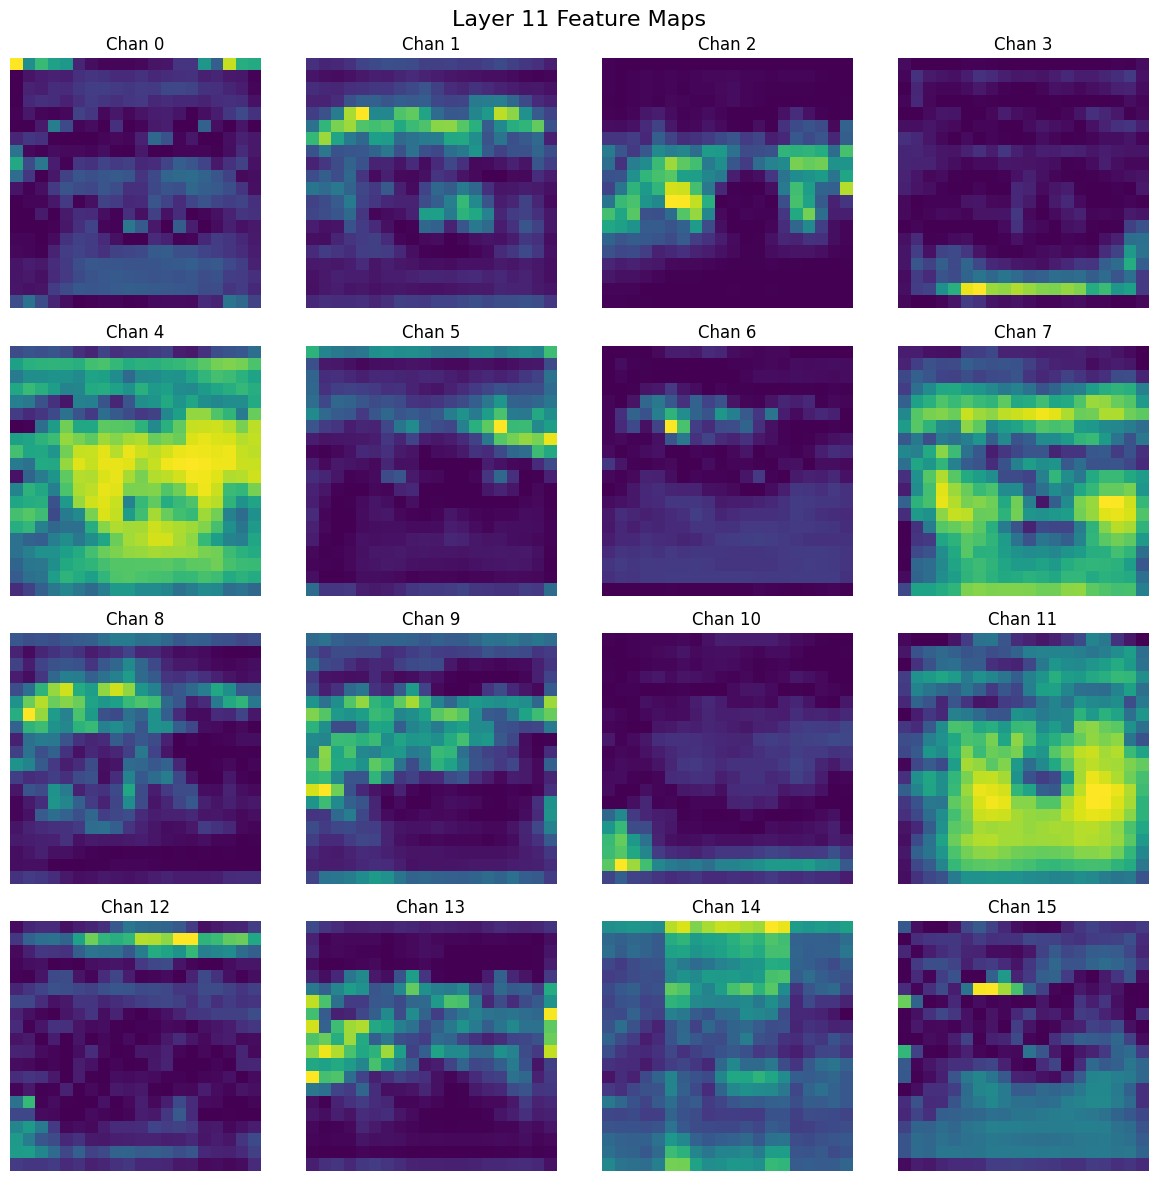

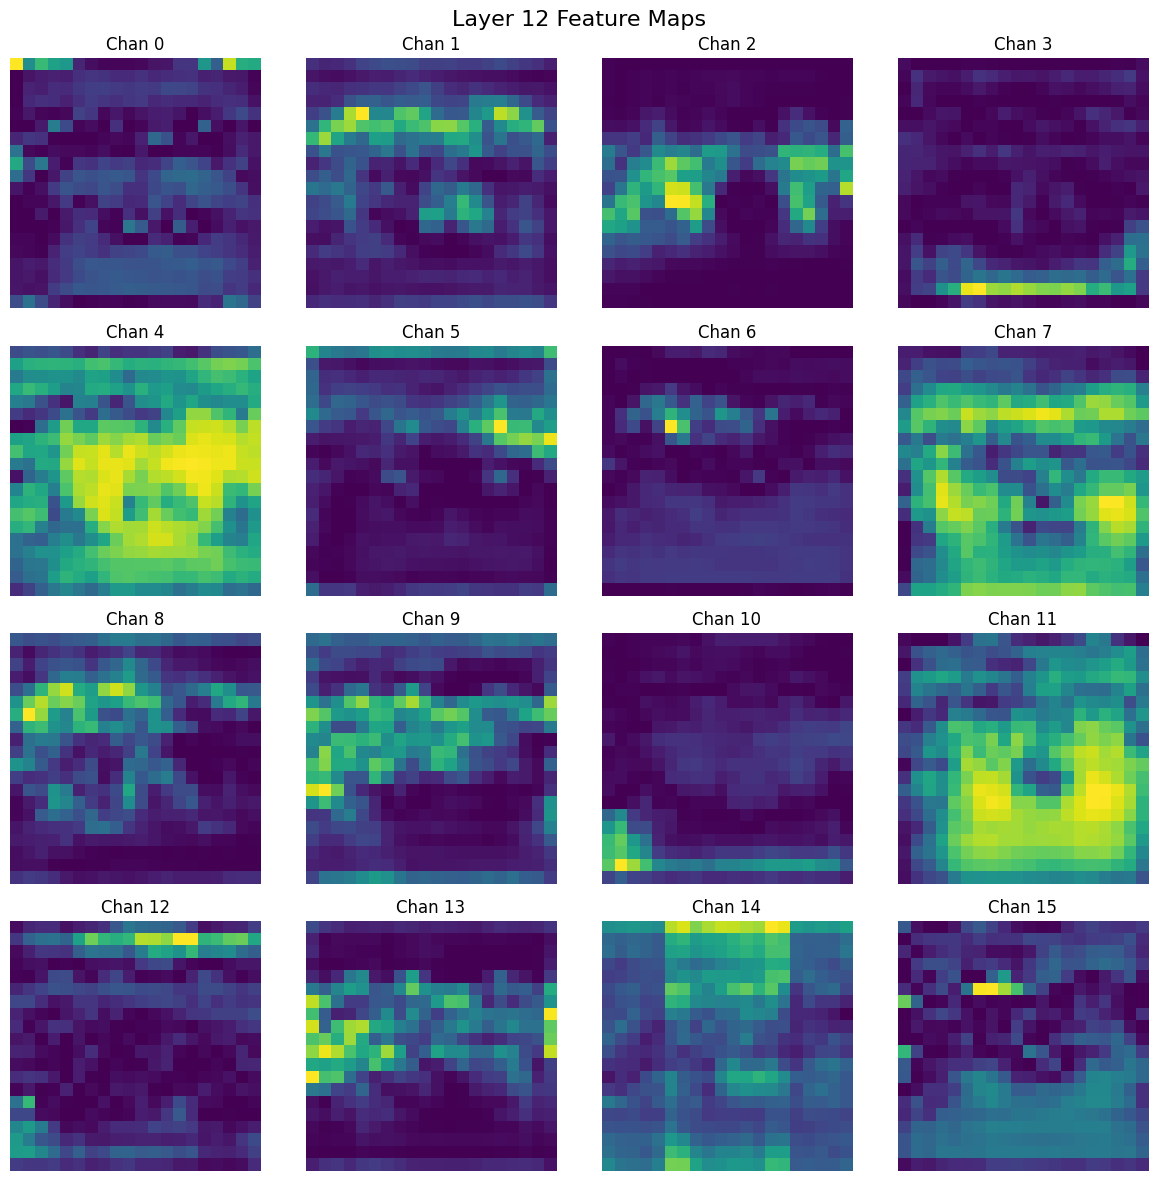

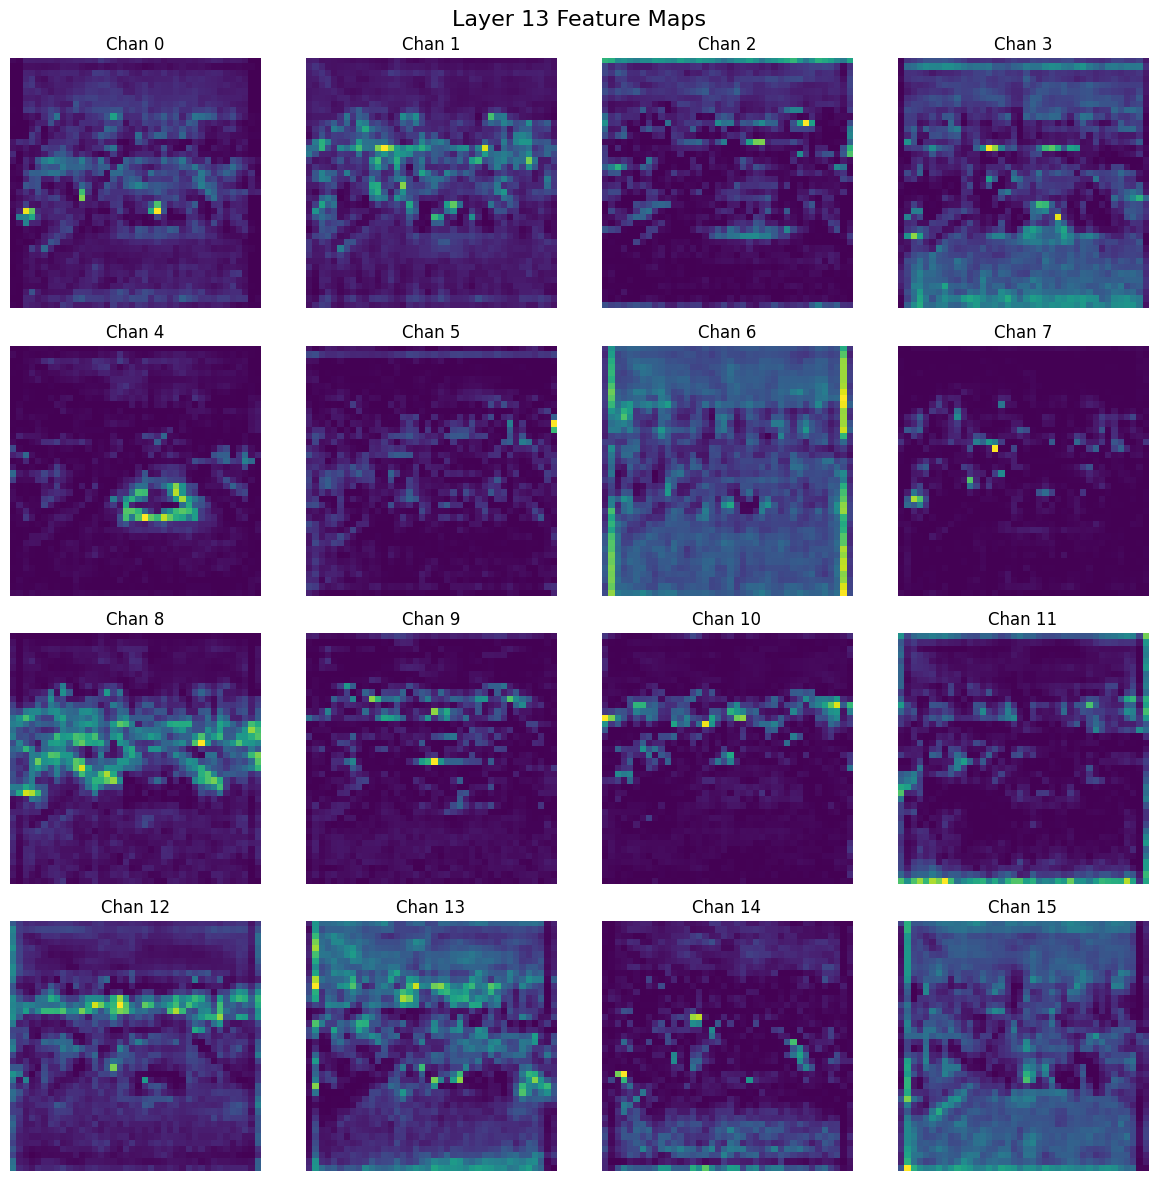

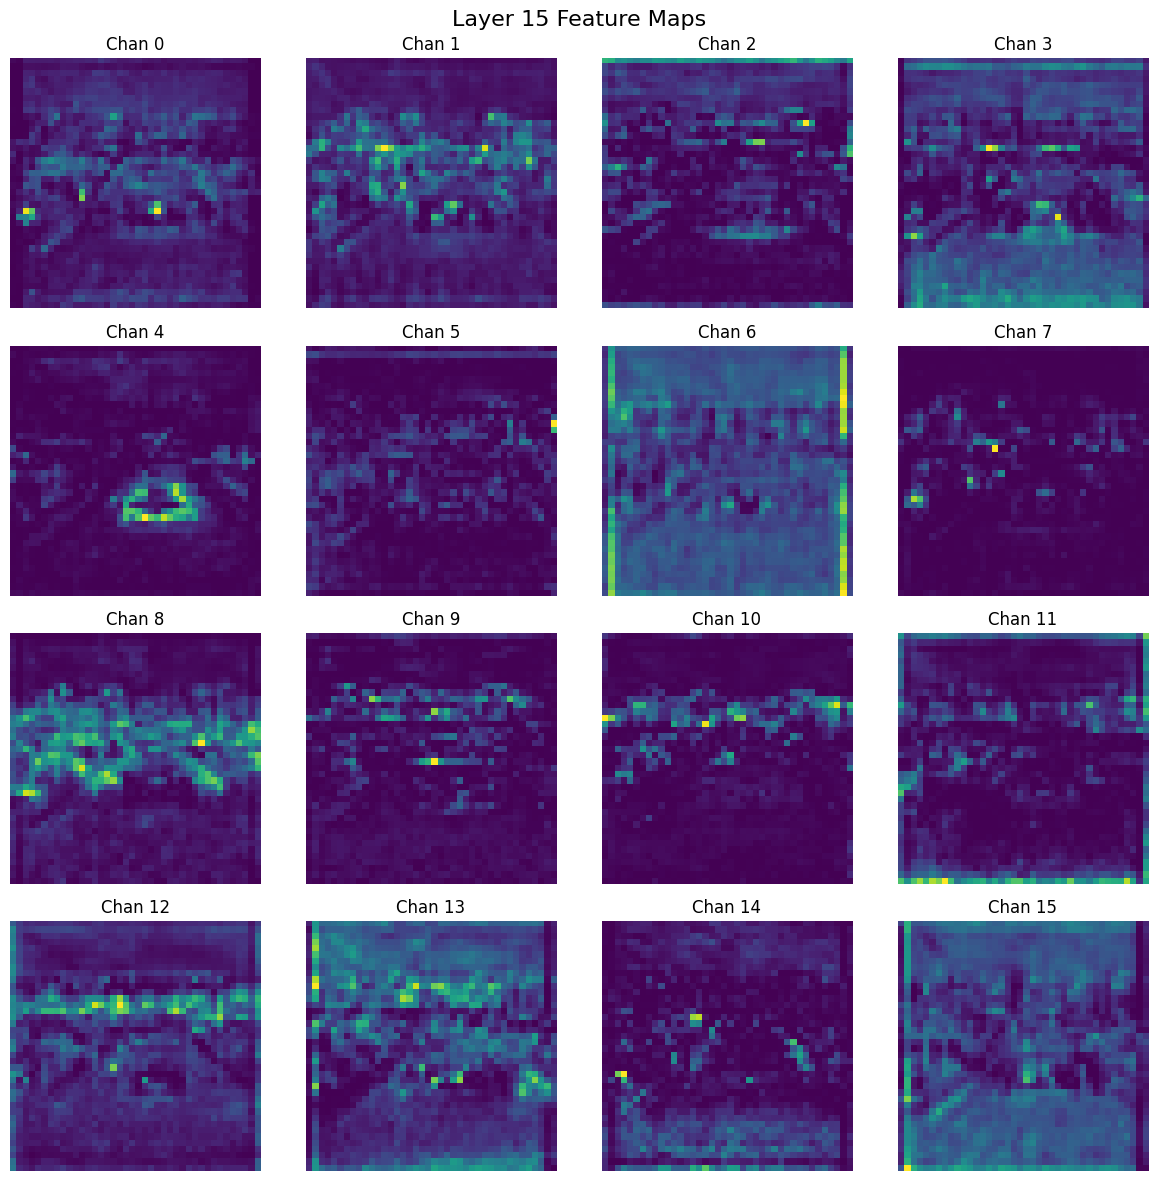

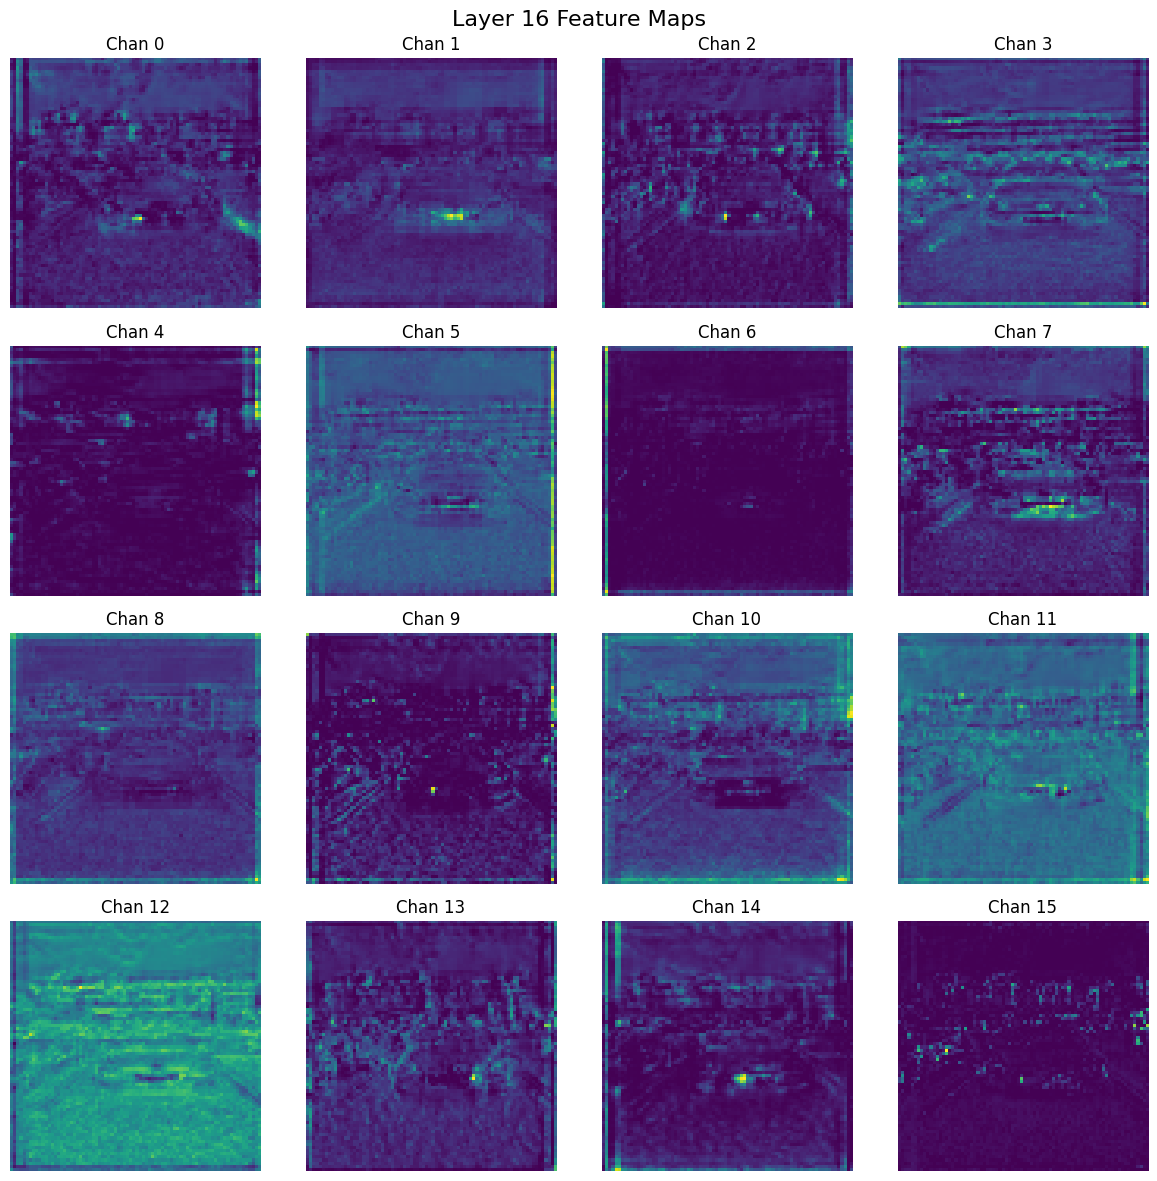

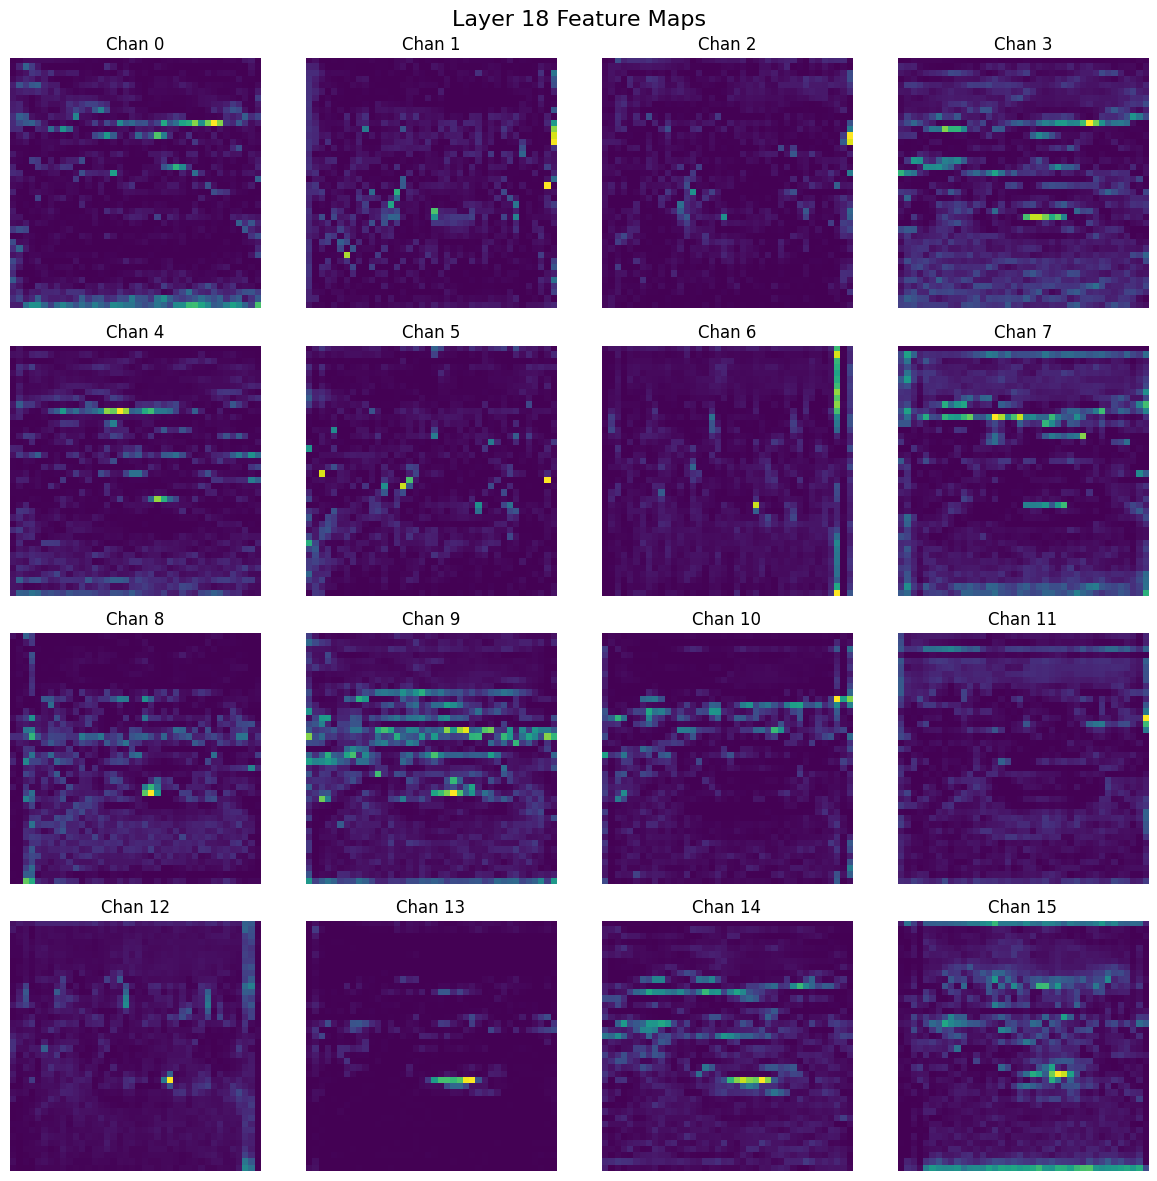

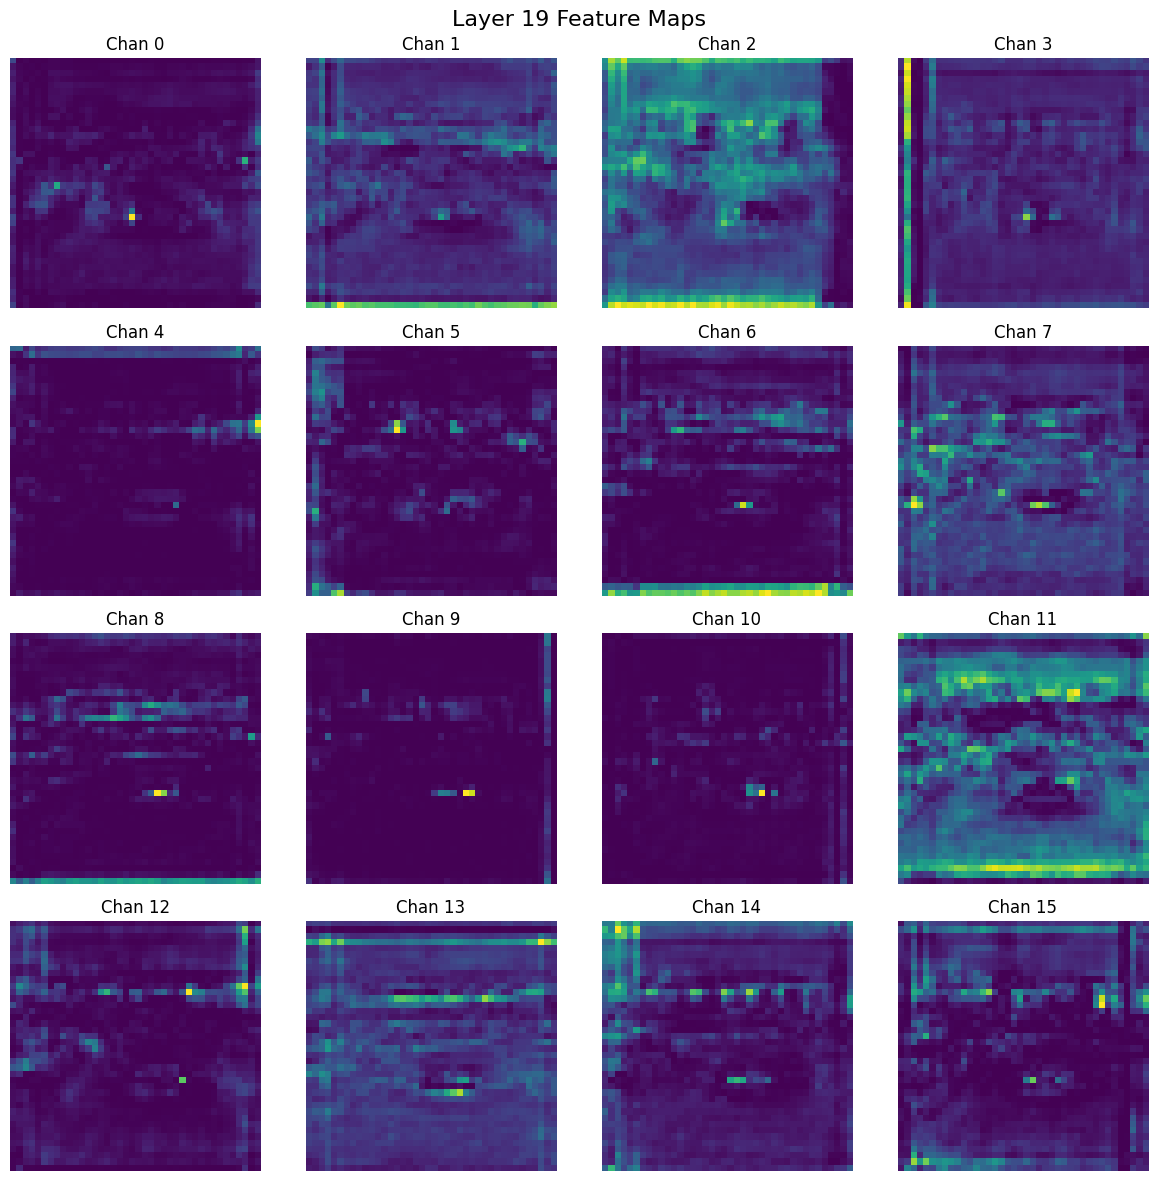

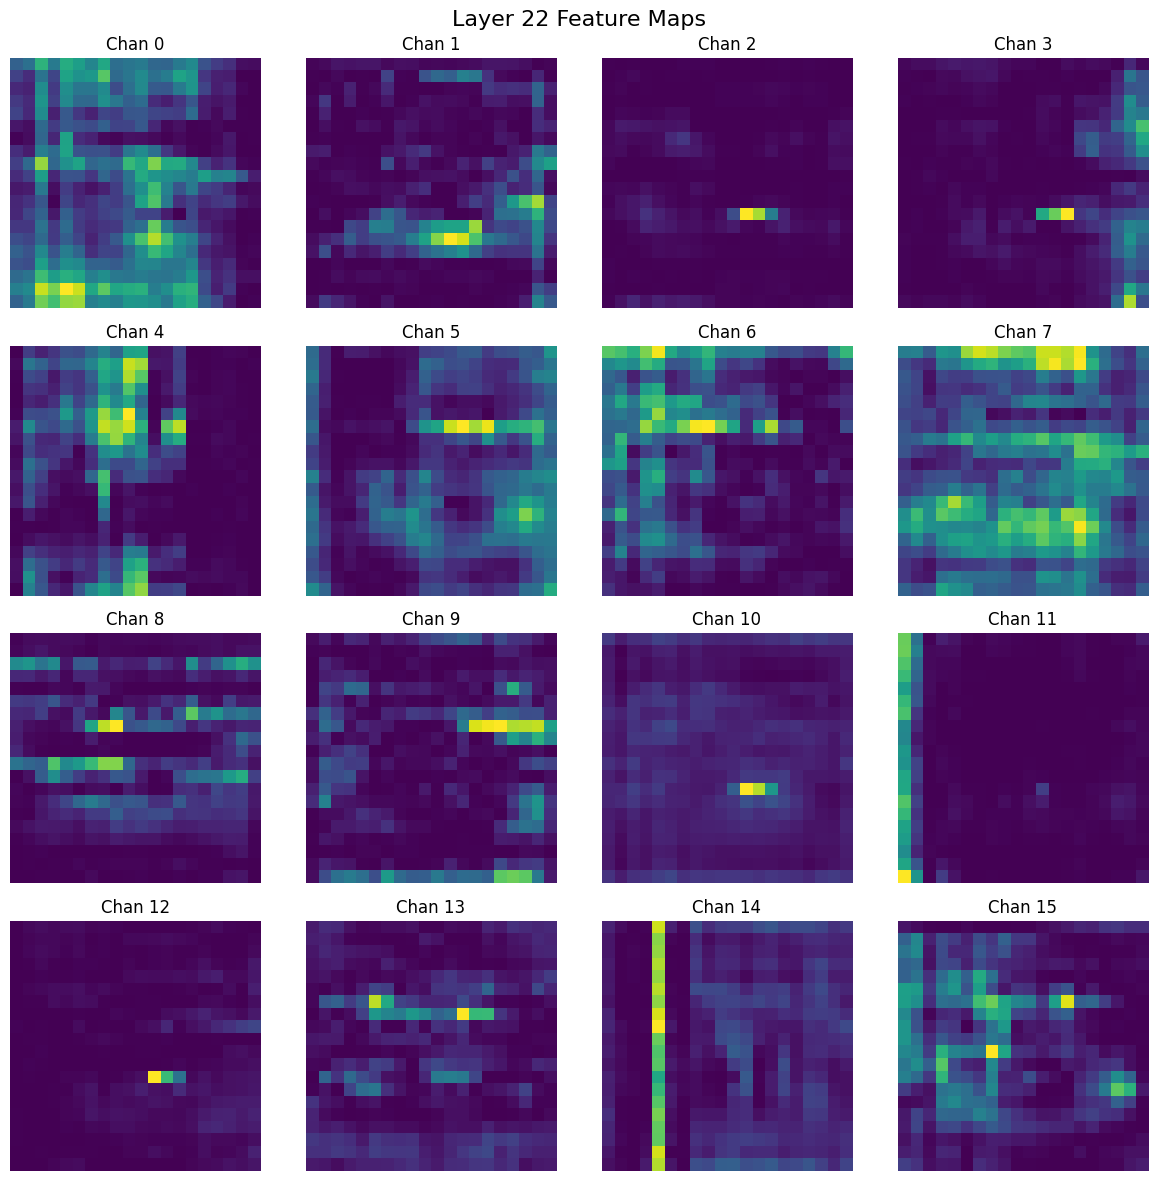

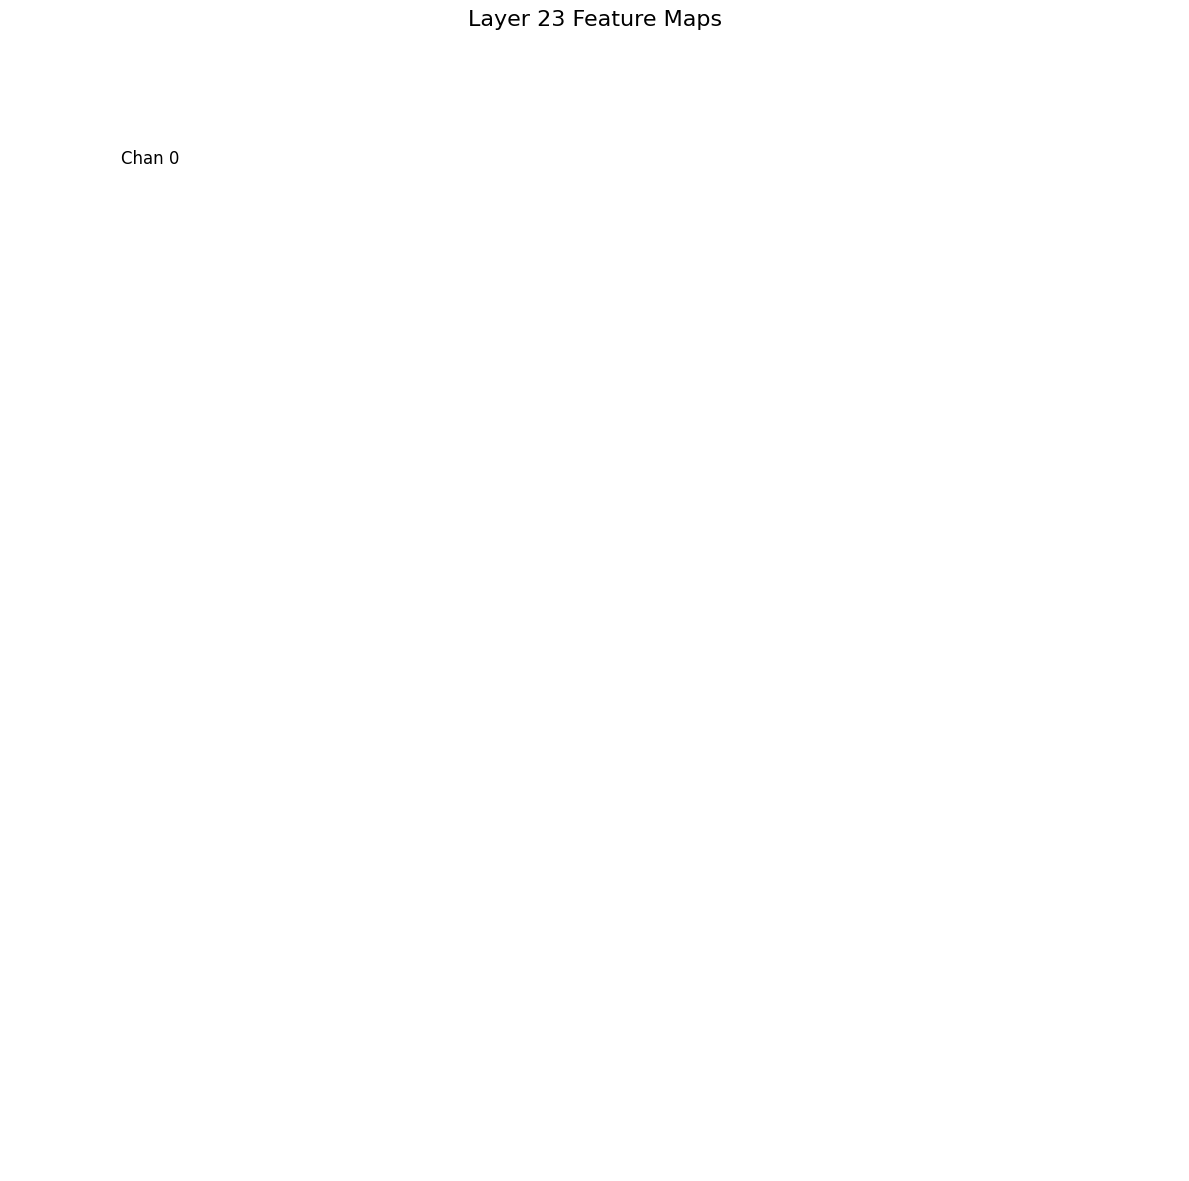

In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from ultralytics import YOLO
import os

# -----------------------------------------------------
# 1) Load the Model
model_path = "C:/Users/Utku/Desktop/YAP470 PROJE/models/best.pt"
yolo = YOLO(model_path)
model = yolo.model
model.eval()

# -----------------------------------------------------
# 2) Load the Image and Preprocess
image_path = r"C:\Users\Utku\Desktop\YAP470 PROJE\polo.jpeg"
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor()
])
input_tensor = transform(image).unsqueeze(0)  # [1, 3, 640, 640]

# -----------------------------------------------------
# 3) Prepare the Forward Hook
layer_outputs = {}

def get_features(name):
    def hook(model, input, output):
        layer_outputs[name] = output
    return hook

num_layers = 24
for i in range(num_layers):
    model.model[i].register_forward_hook(get_features(str(i)))

# -----------------------------------------------------
# 4) Run the Model
with torch.no_grad():
    _ = model(input_tensor)

# -----------------------------------------------------
# 5) Visualize Outputs and Save as PNG
num_channels = 16
rows, cols = 4, 4

# Define the folder where the images will be saved. Create it if it does not exist.
save_dir = "layer_outputs"
os.makedirs(save_dir, exist_ok=True)

for layer_name in sorted(layer_outputs.keys(), key=lambda x: int(x)):
    features = layer_outputs[layer_name][0].detach().cpu().numpy()  # [C, H, W]

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    axes = axes.flatten()
    fig.suptitle(f"Layer {layer_name} Feature Maps", fontsize=16)

    for i in range(num_channels):
        if i < features.shape[0]:
            axes[i].imshow(features[i], cmap='viridis')
            axes[i].axis('off')
            axes[i].set_title(f"Chan {i}")
        else:
            axes[i].axis('off')

    plt.tight_layout()
    
    # Save as PNG
    save_path = os.path.join(save_dir, f"layer_{layer_name}.png")
    plt.savefig(save_path, dpi=300)
    plt.show()


**Import necessary libraries**

In [2]:
import cv2
import numpy as np
from PIL import Image
import ultralytics
from ultralytics import YOLO
import easyocr
import uuid
import os


ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.12.3 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5940MiB)
Setup complete ✅ (12 CPUs, 13.5 GB RAM, 70.9/195.8 GB disk)


**Paths for models**

In [3]:
# UBUNTU
LICENSE_MODEL_DETECTION_DIR = './models/yolo11x_trained.pt'
COCO_MODEL_DIR = "./models/yolo11x.pt"
folder_path = "./licenses_plates_imgs_detected/"

# WINDOWS
# LICENSE_MODEL_DETECTION_DIR = 'C:/Users/Utku/Desktop/YAP470 PROJE/models/best.pt'
# COCO_MODEL_DIR = "C:/Users/Utku/Desktop/YAP470 PROJE/models/yolo11x.pt"
# folder_path = "C:/Users/Utku/Desktop/YAP470 PROJE/licenses_plates_imgs_detected/"


**Initializing the OCR reader**

In [4]:
reader = easyocr.Reader(['tr'], gpu=True)

# reader = easyocr.Reader(['en'], gpu=True) / gpu=True only works for UBUNTU because of CUDA.

**Main code for detection and recognition the license plates**

In [5]:
# List of vehicle class IDs as per the COCO dataset
vehicles = [2]  # Vehicles are located at index 2 in COCO dataset

# Initialize YOLO models for license plate detection and COCO object detection
license_plate_detector = YOLO(LICENSE_MODEL_DETECTION_DIR)  # YOLO model for detecting license plates
coco_model = YOLO(COCO_MODEL_DIR)  # YOLO model for detecting general objects from COCO dataset

current_license_text = None  # Variable to store the current license plate text
current_license_text_score = 0
frame_counter = 0  # Counter to track the number of frames processed

def preprocess_license_plate(license_plate_gray):
    """
    Preprocesses the license plate image for OCR.

    """
    # Apply Gaussian Blur to reduce noise and smooth the image
    blurred = cv2.GaussianBlur(license_plate_gray, (5, 5), 0)
    
    # Create a binary image using Adaptive Thresholding to handle varying lighting conditions
    thresh = cv2.adaptiveThreshold(
        blurred, 255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 11, 2
    )
    
    # Optional: Improve the binary image with morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    return blurred  # Returning the blurred image for further processing

def read_license_plate(license_plate_crop):
    """
    Reads the text on the license plate using an OCR algorithm.
    Aggregates the OCR scores and returns the recognized text along with average score.
    
    """
    scores = 0  # Initialize total score
    detections = reader.readtext(license_plate_crop)  # Perform OCR on the cropped license plate
    
    # If no text is detected, return None
    if not detections:
        return None, None

    # Calculate the area of the license plate image for potential boundary checks
    rectangle_size = license_plate_crop.shape[0] * license_plate_crop.shape[1]
    plate = []  # List to store recognized text parts

    # Iterate over each OCR detection result
    for result in detections:
        bbox, text, score = result
        # Unpack bounding box corner points
        (x0, y0), (x1, y1), (x2, y2), (x3, y3) = bbox
        # Calculate length and height of the bounding box (optional for further processing)
        length = np.linalg.norm(np.array([x1, y1]) - np.array([x0, y0]))
        height = np.linalg.norm(np.array([x2, y2]) - np.array([x1, y1]))
        
        print(text)  # Print recognized text to the console
        text = text.upper()  # Convert text to uppercase for consistency
        scores += score  # Accumulate OCR confidence scores
        plate.append(text)  # Add recognized text to the plate list

    # If any text was recognized, join them into a single string and calculate average score
    if plate:
        return " ".join(plate), scores / len(plate)
    else:
        return None, None

def model_prediction(img):
    global frame_counter, current_license_text, current_license_text_score

    """
    Processes the input image to detect vehicles and license plates.
    Annotates the image with bounding boxes and recognized license plate texts.
    
    """
    license_numbers = 0  # Counter for detected license plates
    results = {}  # Dictionary to store detection results
    licenses_texts = []  # List to store recognized license plate texts
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert image from RGB to BGR for OpenCV

    # Perform object detection using the COCO model
    object_detections = coco_model(img)[0]
    # Perform license plate detection using the license plate detector
    license_detections = license_plate_detector(img)[0]

    # Draw vehicle detections from COCO model
    if object_detections.boxes.cls.tolist():
        for detection in object_detections.boxes.data.tolist():
            xcar1, ycar1, xcar2, ycar2, car_score, class_id = detection
            # Check if the detected class is a vehicle and the confidence score is above threshold
            if int(class_id) in vehicles and car_score > 0.30:
                # Draw bounding box for the vehicle
                cv2.rectangle(img, (int(xcar1), int(ycar1)), (int(xcar2), int(ycar2)), (0, 0, 255), 3)
                # Label the bounding box as "Vehicle"
                cv2.putText(
                    img, 
                    "Vehicle", 
                    (int(xcar1), int(ycar1) - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.9, 
                    (0, 0, 255), 
                    2, 
                    cv2.LINE_AA
                )

    # Draw and process license plate detections
    if license_detections.boxes.cls.tolist():
        license_plate_crops_total = []  # List to store all cropped license plate images
        for license_plate in license_detections.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = license_plate
            # Proceed only if the detection confidence is above the threshold
            if score > 0.50:
                # Draw bounding box for the license plate
                cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)
                # Crop the license plate area from the image
                license_plate_crop = img[int(y1):int(y2), int(x1):int(x2), :]
                
                # Generate a unique file name using UUID for saving the cropped image
                img_uuid = uuid.uuid1().hex
                cropped_img_name = f'{img_uuid}.jpg'
                cv2.imwrite(os.path.join(folder_path, cropped_img_name), license_plate_crop)  # Save cropped license plate image

                # Convert the cropped image to grayscale for preprocessing
                license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)

                # Apply preprocessing filters (adaptive thresholding only)
                filtered_image = preprocess_license_plate(license_plate_crop_gray)

                # Save the preprocessed (filtered) image
                filtered_img_name = f'{img_uuid}_filtered.jpg'
                cv2.imwrite(os.path.join(folder_path, filtered_img_name), filtered_image)
                cv2.imshow("License Plate", filtered_image)  # Display the preprocessed license plate image

                # Perform OCR on the filtered image to read license plate text
                license_plate_text, license_plate_text_score = read_license_plate(filtered_image)
                if ((frame_counter % 60 == 0) and (len(str(license_plate_text))>7) and (current_license_text_score < license_plate_text_score)):
                    current_license_text_score = license_plate_text_score
                    print(frame_counter)
                    current_license_text = license_plate_text # Update the license plate text every 60 frames
                licenses_texts.append(current_license_text)  # Add recognized text to the list

                # Display OCR result on the annotated image
                if current_license_text:
                    cv2.putText(
                        img, 
                        f"License Plate: {current_license_text}", 
                        (int(x1), int(y1) - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.9, 
                        (255, 255, 255), 
                        2, 
                        cv2.LINE_AA
                    )

                # If text is recognized with a valid score, store the results
                if current_license_text and license_plate_text_score:
                    license_plate_crops_total.append(filtered_image)  # Add filtered image to the list
                    results[license_numbers] = {
                        'license_plate': {
                            'bbox': [x1, y1, x2, y2],  # Bounding box coordinates
                            'text': current_license_text,  # Recognized text
                            'bbox_score': score,  # Confidence score for bounding box
                            'text_score': license_plate_text_score  # Confidence score for OCR text
                        }
                    }
                    license_numbers += 1  # Increment license plate counter
        frame_counter+=1

        # Return the annotated image, list of license texts, and cropped license plate images
        return [img, licenses_texts, license_plate_crops_total]
    # If no license plates are detected, return only the annotated image
    return [img]

def close_open_windows():
    """
    Closes all OpenCV windows that are currently open.
    """
    cv2.destroyAllWindows()

def main():
    """
    Main function to execute the license plate detection and OCR.
    Handles both image and video inputs based on user input.
    """
    file_path = input("Enter the path of the image or video: ")  # Prompt user for file path

    # If the file is an image
    if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(file_path)  # Read the image from the provided path
        if img is not None:
            
            results = model_prediction(img)  # Perform model prediction on the image
            img_with_box = results[0]  # Get the annotated image

            # Display the annotated image in a resizable window
            cv2.namedWindow("License Plate Detection", cv2.WINDOW_NORMAL)
            cv2.resizeWindow("License Plate Detection", 640, 640)
            cv2.imshow("License Plate Detection", img_with_box)
        
            # Generate a random file name using UUID to save the annotated image
            random_filename = f"detected_{uuid.uuid4().hex}.jpg"
            cv2.imwrite(random_filename, img_with_box)
            print(f"Image saved: {random_filename}")  # Inform the user about the saved image
        
            cv2.waitKey(0)  # Wait indefinitely until a key is pressed
        
            # Close all OpenCV windows
            close_open_windows()
        
        else:
            print("Image file could not be read.")  # Error message if image reading fails
    
    # If the file is a video
    elif file_path.lower().endswith(('.mp4', '.avi')):
        cap = cv2.VideoCapture(file_path)  # Open the video file
        while cap.isOpened():
            ret, frame = cap.read()  # Read a frame from the video
            if not ret:
                break  # Exit the loop if no frame is returned

            results = model_prediction(frame)  # Perform model prediction on the current frame
            frame_with_box = results[0]  # Get the annotated frame

            # Display the annotated frame in a resizable window
            cv2.namedWindow("License Plate Detection", cv2.WINDOW_NORMAL)
            cv2.resizeWindow("License Plate Detection", 640, 640)
            cv2.imshow("License Plate Detection", frame_with_box)

            # Allow the user to quit the video display by pressing 'q'
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break  # Exit the loop if 'q' is pressed

        cap.release()  # Release the video capture object
        close_open_windows()  # Close all OpenCV windows
    
    else:
        print("Unsupported file format.")  # Error message for unsupported file types

# Entry point of the script
if __name__ == "__main__":
    main()



0: 640x384 2 cars, 3 traffic lights, 91.4ms
Speed: 2.8ms preprocess, 91.4ms inference, 296.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 License_Plate, 29.4ms
Speed: 1.5ms preprocess, 29.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
06 DJ 4096
0

0: 640x384 2 cars, 4 traffic lights, 25.5ms
Speed: 2.9ms preprocess, 25.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 License_Plate, 26.1ms
Speed: 3.7ms preprocess, 26.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)
06DJ 4096

0: 640x384 2 cars, 3 traffic lights, 25.2ms
Speed: 3.6ms preprocess, 25.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 License_Plate, 28.6ms
Speed: 2.5ms preprocess, 28.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)
06 DJ 4096

0: 640x384 2 cars, 3 traffic lights, 25.5ms
Speed: 2.0ms preprocess, 25.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 38

In [ ]:
# EXAMPLE PATHS FOR UBUNTU

# /home/utku/licensePlateDataset/test/images/pic_683_jpg.rf.202701461998508ec50c4a6a95eedee3.jpg
# /home/utku/araba.jpeg
# /home/utku/video.mp4
# /home/utku/traffic_flow.mp4

# EXAMPLE PATHS FOR WINDOWS

# C:/Users/Utku/Desktop/YAP470 PROJE/video.mp4
# C:/Users/Utku/Desktop/YAP470 PROJE/polo.jpeg
# C:/Users/Utku/Desktop/YAP470 PROJE/poloarka.jpeg
# C:/Users/Utku/Desktop/YAP470 PROJE/polouzak.jpeg
# C:/Users/Utku/Desktop/YAP470 PROJE/uzgunotobus.jpeg
# C:/Users/Utku/Desktop/YAP470 PROJE/bmw.jpeg